<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
star_rating       979 non-null float64
title             979 non-null object
content_rating    976 non-null object
genre             979 non-null object
duration          979 non-null int64
actors_list       979 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


#### Check the number of rows and columns.

In [4]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [5]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [6]:
# Answer:
movies['duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [7]:
# Answer:
movies.sort_values(by='duration').agg(['min','max'])

,star_rating,title,genre,duration,actors_list
min,7.4,(500) Days of Summer,Action,64,"[u""Brian O'Halloran"", u'Jeff Anderson', u'Mari..."
max,9.3,[Rec],Western,242,"[u'Zooey Deschanel', u'Joseph Gordon-Levitt', ..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

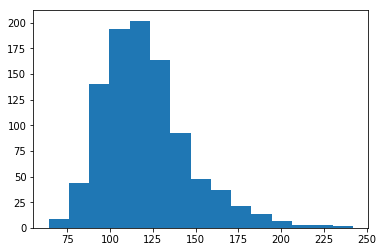

In [8]:
# Answer:
plt.hist(movies['duration'],bins=15);

#### Use a box plot to display that same data.

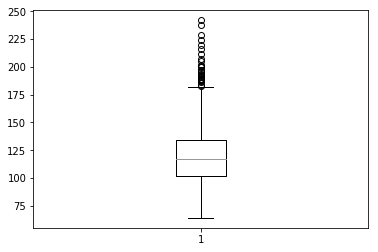

In [9]:
# Answer:
plt.boxplot(movies['duration']);

## Intermediate level

#### Count how many movies have each of the content ratings.

In [11]:
# Answer:
movies['content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

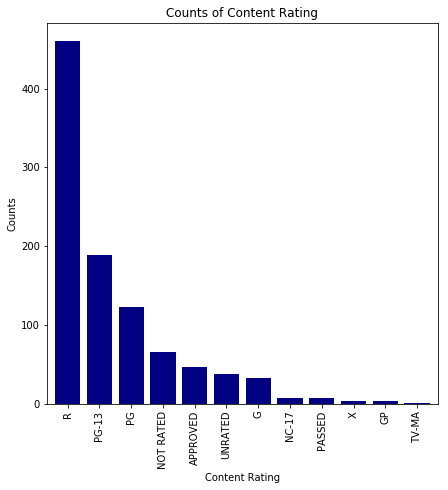

In [12]:
# Answer:
plt.figure(figsize=(7,7))
movies['content_rating'].value_counts().plot(kind='bar',color='navy',width=.8)
plt.title('Counts of Content Rating')
plt.xticks(rotation=90)
plt.xlabel('Content Rating');
plt.ylabel('Counts');
plt.show()


#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [38]:
# Answer:
movies['content_rating'].replace(to_replace=['NOT RATED','APPROVED','PASSED','GP'],value='UNRATED',inplace=True)
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [40]:
# Answer:
movies['content_rating'].replace(to_replace=['X','TV-MA'],value='NC-17',inplace=True)
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [46]:
# Answer:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [48]:
# Answer:
movies[movies.content_rating.isnull()]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [56]:
movies.dropna(inplace=True)
movies.isnull().sum()

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [18]:
# Answer:
movies[movies.duration >= 120].star_rating.mean()

7.948898678414082

In [19]:
movies[movies.duration < 120].star_rating.mean()

7.838666666666657

#### Use a visualization to detect whether there is a relationship between duration and star rating.

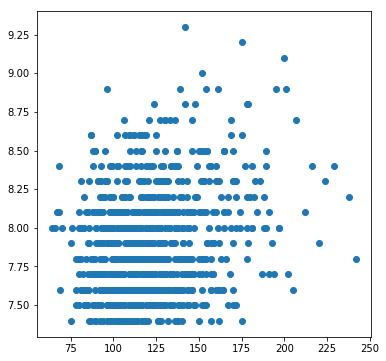

In [20]:
# Answer:
plt.figure(figsize=(6,6))
plt.scatter(x=movies.duration,y=movies.star_rating);


#### Calculate the average duration for each genre.

In [21]:
# Answer:
by_genre = movies.groupby('genre')
by_genre.duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

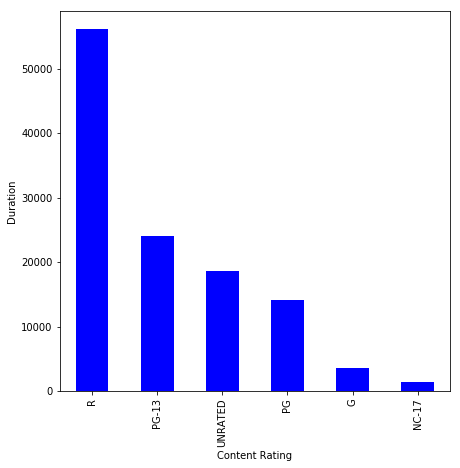

In [90]:
# Answer:
plt.figure(figsize=(7,7))
by_content_rating = movies.groupby('content_rating')
by_content_rating.duration.sum().sort_values(ascending=False).plot(kind='bar', color='blue')
plt.xlabel('Content Rating');
plt.ylabel('Duration');

#### Determine the top rated movie (by star rating) for each genre.

In [99]:
# Answer:
movies.groupby('genre').star_rating.max()

genre
Action       9.0
Adventure    8.9
Animation    8.6
Biography    8.9
Comedy       8.6
Crime        9.3
Drama        8.9
Family       7.9
Fantasy      7.7
Film-Noir    8.3
History      8.0
Horror       8.6
Mystery      8.6
Sci-Fi       8.2
Thriller     8.0
Western      8.9
Name: star_rating, dtype: float64

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [115]:
# Answer:
movies.title.duplicated().sum()

3

In [138]:
movies.title.drop_duplicates(inplace=True)
movies.title.duplicated().sum()

0

In [139]:
movies.shape

(976, 6)

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [148]:
# Answer:
rel_genres = ['Drama','Comedy','Action','Crime','Biography','Adventure','Animation','Horror','Mystery']
         

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [141]:
# Answer:


#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [27]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [28]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!